## Load data

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Udemy - Data Science Mega-Course_Build {120-Projects In 120-Days}"

'Project_1_Pan Card Tempering Detector App - Deploy On Heroku'
'Project_2_Dog breed prediction Flask App'
'Project_3_Image Watermarking App'
'Project_4_Traffic sign classification'
'Project_5_Text Extraction from image App'
'Project_6_Plant Disease Prediction'


After mounting our drive we will locate the folder where our data is stored to use it in our colab notebook.
Here you can see that I have 2 folders in my drive and 'Plant_images_pianlytix'  contains the images that we will work on.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

Next we will import all the required libraries. As we are making a CNN model we will import all the required layers, activations, optimizers, etc.  

In [4]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Udemy - Data Science Mega-Course_Build {120-Projects In 120-Days}/Project_6_Plant Disease Prediction/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Output hidden; open in https://colab.research.google.com to view.

In [5]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
dir = "/content/drive/MyDrive/Udemy - Data Science Mega-Course_Build {120-Projects In 120-Days}/Project_6_Plant Disease Prediction/Collab Code/Data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

## Check imbalance data

In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

We can see the dataset is balanced.

In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
label_list = np.array(label_list)
label_list.shape

(900,)

## Generalize data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [11]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Model

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# use L1 for prevent overfitting
model.add(Dense(8, activation="relu", kernel_regularizer='l1'))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [21]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [22]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 5s 1s/step - loss: 17.3422 - accuracy: 0.3957 - val_loss: 16.7741 - val_accuracy: 0.4224
Epoch 2/50
4/4 [==============================] - 1s 147ms/step - loss: 16.5033 - accuracy: 0.4500 - val_loss: 15.9450 - val_accuracy: 0.5948
Epoch 3/50
4/4 [==============================] - 1s 151ms/step - loss: 15.6774 - accuracy: 0.6087 - val_loss: 15.1437 - val_accuracy: 0.6034
Epoch 4/50
4/4 [==============================] - 1s 180ms/step - loss: 14.8693 - accuracy: 0.6022 - val_loss: 14.3517 - val_accuracy: 0.6121
Epoch 5/50
4/4 [==============================] - 1s 196ms/step - loss: 14.0846 - accuracy: 0.6261 - val_loss: 13.5733 - val_accuracy: 0.6466
Epoch 6/50
4/4 [==============================] - 1s 181ms/step - loss: 13.3190 - accuracy: 0.6457 - val_loss: 12.8207 - val_accuracy: 0.6466
Epoch 7/50
4/4 [==============================] - 1s 196ms/step - loss: 12.5740 - accuracy: 0.6500 - val_loss: 12.0801 - val_accuracy: 0.6552
Epoch 8/5

## Evaluate Model

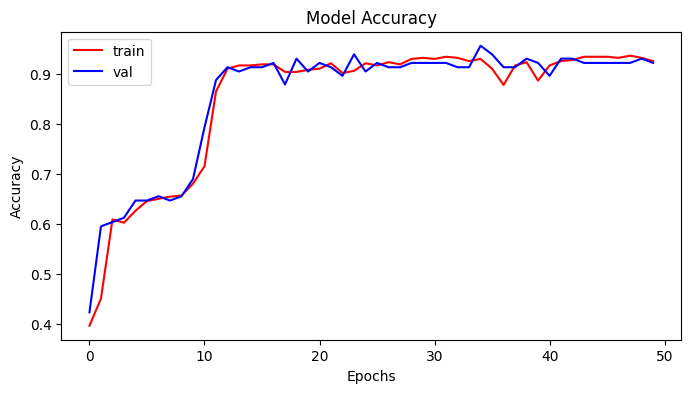

In [26]:
#Plot the training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

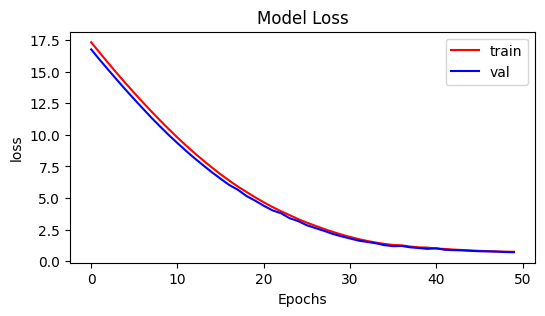

In [28]:
# Plot the training history
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [24]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 55ms/step - loss: 0.6961 - accuracy: 0.9611
Test Accuracy: 96.11111283302307


## Test

In [38]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 31ms/step


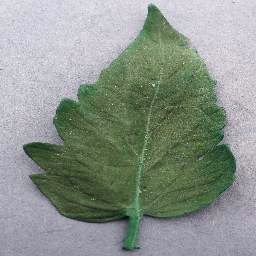

In [29]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [30]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


In [40]:
original_labels = [all_labels[np.argmax(y_test[idx])] for idx in range(len(y_test))]
predicted_labels = [all_labels[np.argmax(y_pred[idx])] for idx in range(len(y_pred))]

In [41]:
df = pd.DataFrame({'Original Label': original_labels, 'Predicted Label': predicted_labels})

In [42]:
df

,Original Label,Predicted Label
0,Potato-Early_blight,Potato-Early_blight
1,Corn-Common_rust,Corn-Common_rust
2,Tomato-Bacterial_spot,Tomato-Bacterial_spot
3,Corn-Common_rust,Corn-Common_rust
4,Corn-Common_rust,Corn-Common_rust
...,...,...
175,Corn-Common_rust,Corn-Common_rust
176,Tomato-Bacterial_spot,Tomato-Bacterial_spot
177,Corn-Common_rust,Corn-Common_rust
178,Tomato-Bacterial_spot,Tomato-Bacterial_spot


In [43]:
df['Bool'] = (df['Original Label'] == df['Predicted Label']).astype(int)

In [44]:
print(f'accuracy : {len(df[df["Bool"] == 1])/ df.shape[0]*100}')

accuracy : 96.11111111111111


## Save Model

In [45]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
